Data from kaggle https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction?select=data.csv
Goal is to upload code to Github

EDA: Taiwan Economic Journal 1999-2009
utalizing 95 parameters and holds 6819 instances

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')

In [10]:
from sklearn.model_selection import train_test_split

In [6]:
#for future reference - problbly not needed and instead something done to make myself feel good ..
paremters = df.columns

In [24]:
#these make a list of the desired column names. (Seeing first hand why practice with now strings attached in necessary for me)
y = list(paremters).pop(0)
x = list(paremters)[1:]

In [26]:
#Now I will make the data frames necesary
#loc notes - first rows than columns and allowed to put a list in here. 
#Can also retrice individual points in DF as well as set individual points in df

x_df = df.loc[:,x]
y_df = df.loc[:,y]

In [31]:
#have fun with this and realize it is scratch work :) yay, I like that approach better :) who the fuck would want to read this shitty experiment anyway .. this is for you to learn .. when someone pays you that if for others  .. kinda weird for me to say yet true ..


(6819,)

In [48]:
y_df.value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [87]:
#test train split likes things as array data types which can easily be solved with "df.to_numpy() or df.values" first is more updated
X_train, X_test, y_train, y_test = train_test_split(x_df.to_numpy(), y_df.to_numpy(), test_size=0.33, stratify =y_df, random_state=33)

In [88]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(4568, 95) (2251, 95)
(4568,) (2251,)


In [89]:
#a crude check for myself to ensure that the stratify works. Need to be comfortable using whatever method that works rather then stubernly looking looking for one method to check things
#bring back to mind the purpose of the check you are trying to complete. If something short term focused, don't expense out soo much search energy ... its not a smart move for the project
#get what you need done, done and move on. If something in the future depends on this I am able to revisit and easily put in search energy
print(np.count_nonzero(y_test == 0) / np.count_nonzero(y_test ==1))
print(np.count_nonzero(y_train == 0) / np.count_nonzero(y_train ==1))
#good news. stratify works and this check works ... its fun to run my own experiements and damn these computers crank things out fast when you type the right words.

29.835616438356166
30.07482993197279


In [90]:
from sklearn.linear_model import LogisticRegression


In [91]:
logreg = LogisticRegression()

In [92]:
logreg.fit(X_train, y_train)

C:\Users\mitch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
predictions = logreg.predict(X_test)

In [96]:
score = logreg.score(X_test, y_test)
print(score)

0.9675699689027099


In [98]:
import seaborn as sns
from sklearn import metrics

In [99]:
#This is where I see that there is a major class imbalence which is throwing off my model into guessing not bankrupt every time
cm_ugly = metrics.confusion_matrix(y_test, predictions)
print(cm_ugly)

[[2178    0]
 [  73    0]]


In [107]:
np.count_nonzero(predictions == 1)

0

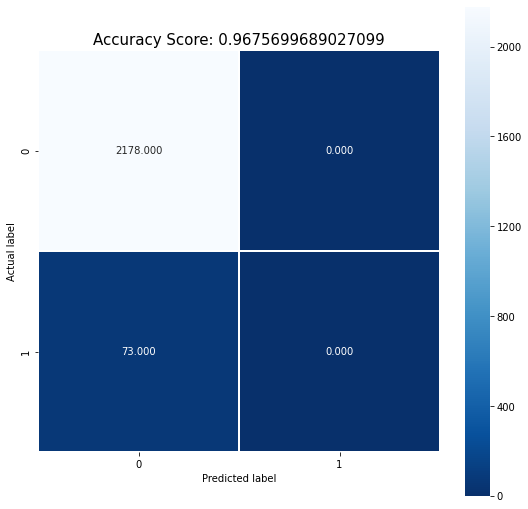

In [106]:
#code for Seaborn CM
plt.figure(figsize=(9,9))
sns.heatmap(cm_ugly, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

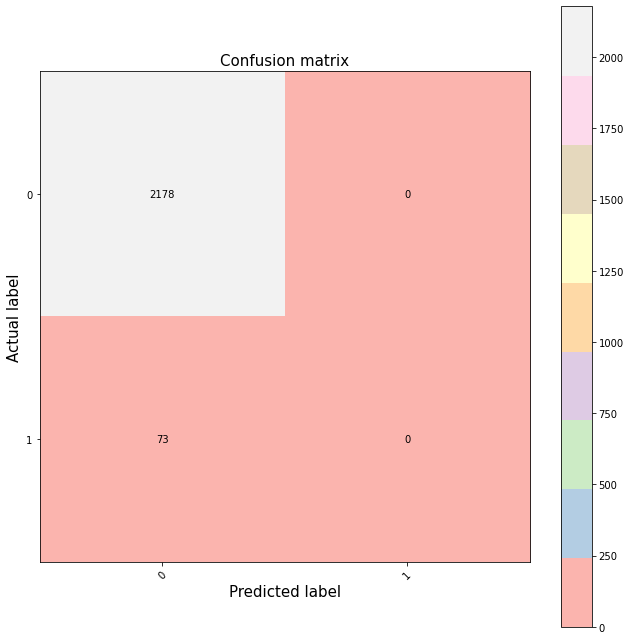

In [117]:
#messing around with matplotlib code for graphing, hashed out code to show CM with 10 categories
plt.figure(figsize=(9,9))
plt.imshow(cm_ugly, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
#tick_marks = np.arange(10)
tick_marks = np.arange(2)
#plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 10)
#plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.yticks(tick_marks, ["0", "1"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm_ugly.shape
#for x in xrange(width):
for x in [0,1]:
 #for y in xrange(height):
    for y in [0,1]:
      plt.annotate(str(cm_ugly[x][y]), xy=(y, x), 
      horizontalalignment='center',
      verticalalignment='center')

In [118]:
#problem is still arising of imballenced classed
#Love that I get to have these projects as exersizes rather than having them as something that needs to be "turned in"
#this allows me to try much more, meaning learn much more